# Manipulation des données spatiales avec Python

-/-/- Author: Abdoulaye DIALLO   
-/-/- École: ENSAI               
-/-/- Cours: Spatial Data        

### Mes sources intéréssantes:


### [Working-with-geospatial-data ](https://campus.datacamp.com/courses/working-with-geospatial-data-in-python/spatial-relationships?ex=11)

---------------------

In [1]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt

## Les données gpkg je l'ai directement extrait des library R en format geo.

In [2]:
georgia = gpd.read_file("georgiadata.gpkg")
georgia.head()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/geopandas/geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


,Latitude,Longitud,TotPop90,PctRural,PctBach,PctEld,PctFB,PctPov,PctBlack,X,Y,ID,Name,MedInc,geometry
0,31.75339,-82.28558,15744.0,75.6,8.2,11.43,0.64,19.9,20.76,941396.6,3521764.0,13001,Appling,32152.0,"MULTIPOLYGON (((-82.22520 31.91288, -82.22131 ..."
1,31.29486,-82.87474,6213.0,100.0,6.4,11.77,1.58,26.0,26.86,895553.0,3471916.0,13003,Atkinson,27657.0,"MULTIPOLYGON (((-82.62930 31.36364, -82.62999 ..."
2,31.55678,-82.45115,9566.0,61.7,6.6,11.11,0.27,24.1,15.42,930946.4,3502787.0,13005,Bacon,29342.0,"MULTIPOLYGON (((-82.52171 31.71060, -82.49647 ..."
3,31.33084,-84.45401,3615.0,100.0,9.4,13.17,0.11,24.8,51.67,745398.6,3474765.0,13007,Baker,29610.0,"MULTIPOLYGON (((-84.14070 31.43990, -84.14168 ..."
4,33.07193,-83.25085,39530.0,42.7,13.3,8.64,1.43,17.5,42.39,849431.3,3665553.0,13009,Baldwin,36414.0,"MULTIPOLYGON (((-83.27423 33.18710, -83.25783 ..."


## Question 1
Ecrire un code qui permet de représenter les comtés de Géorgie (dataframe georgia) en choisissant une couleur de votre choix mais avec 11 classes pour décrire la distribution du revenu médian en milliers de dollars (MedInc). Cette carte devra contenir une légende et doit permettre d’exporter cette carte en format TIFF.

## MEDINC

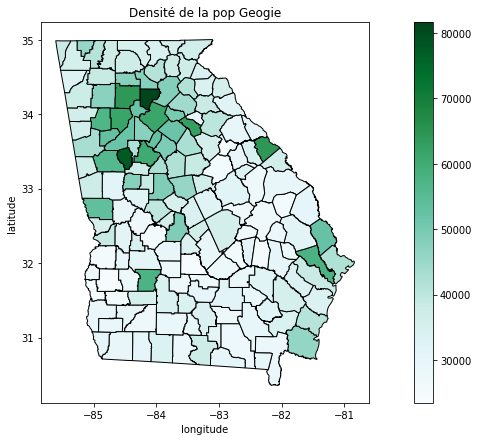

In [6]:
# Revenue Médian
georgia.plot(column = 'MedInc', legend = True, cmap = 'BuGn', edgecolor = 'black', k=11, figsize=(16,7))
plt.title('Densité de la pop Geogie')
plt.xlabel('longitude')
plt.ylabel('latitude');

### Question 2
Il est connu que l’on peut faire dire des choses fallacieuses à des cartes. L’une des erreurs communes est de mal représenter la distribution d’une variable ne continue en ne la catégorisant pas de la bonne façon. Dans cette question vous devez produire trois cartes représentant la même variable en montrant comment le choix du cut peut influencer la représentation du phénomène sur la carte. Pour cela vous utiliserez la variable représentant le nombre de maisons dans le New Heaven (variable HSE_UNITS dans l’objet blocks) que vous découperez en 5 classes en utilisant différentes manières de constituer ces classes (quantiles, rangs absolus, écart-type). Rajouter des légendes sur vos cartes.


In [8]:
newhaven = gpd.read_file("newhaven.gpkg")

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/geopandas/geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


<AxesSubplot:>

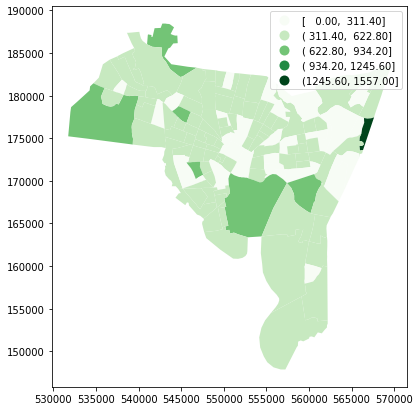

In [10]:
 newhaven.plot(column='HSE_UNITS', scheme='equal_interval', k=5, cmap='Greens', figsize=(16,7), legend=True)

<AxesSubplot:>

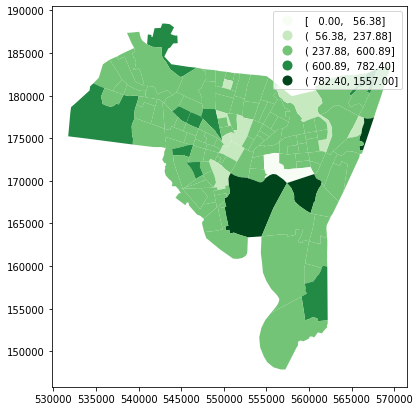

In [58]:
# 2. Découpage par sdCuts StdMean
newhaven.plot(column='HSE_UNITS', scheme='StdMean', k=5, cmap='Greens', figsize=(16,7), legend=True)

<AxesSubplot:>

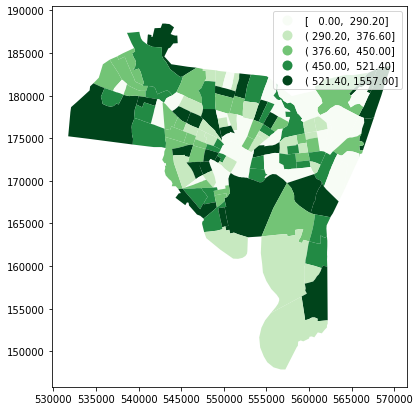

In [60]:
# 2. Avec quantileCuts 
newhaven.plot(column='HSE_UNITS', scheme='quantiles', k=5, cmap='Greens', figsize=(16,7), legend=True)

#### Notes
En concervant la meme couleur on rermarque une différence de distribution de l'echelle des couleur, d'ou l'importance de choisir le meilleur moyen de cut.

## Question 3
Objectif : création d’un attribut secondaire et utiliser une condition logique pour sélectionner des objets quand cet opérateur logique s’applique aux attributs que vous venez de créer.  
Une entreprise souhaite commercialiser un produit en direction des populations vivant dans des zones rurales. Leur modèle leur permet de conclure qu’elle pourra vendre une unité de leur produit par tranche de 20 habitants de ces zones rurales visitées par un représentant de leur équipe de vente. Pour cela elle veut déterminer quels sont les comtés des données de Géorgie qui a une densité de 20 habitants par km². A partir des données écrire le code qui permet de sélectionner des comtés sur la base d’un critère de densité de population. Pour cela vous calculerez un score de densité de population et représenterez sur une carte les comtés qui ont une densité supérieure à 20 habitants par km²

In [65]:
georgia3["PctRural"]*georgia3["TotPop90"] / 100

0      11902.464
1       6213.000
2       5902.222
3       3615.000
4      16879.310
         ...    
154    50723.400
155     7008.000
156     6315.812
157    10228.000
158    14038.695
Length: 159, dtype: float64

In [97]:
# Pop rural

georgia3["poprural"] = georgia3["PctRural"]*georgia3["TotPop90"] / 100 # Ajoute de la variables poprural dasn la base georgia

# calcule de la superficie des comtés en Km^2    
georgia3_3857 = georgia3.to_crs(epsg = 3857) # create a copy of districts that uses EPSG:3857
# define a variable for m^2 to km^2 and get area in kilometers squared
sqm_to_sqkm = 10**6
georgia3["district_area_km"] = georgia3_3857.geometry.area / sqm_to_sqkm

georgia3['poprur_density'] = georgia3.apply(lambda row: row.poprural/row.district_area_km, axis = 1)
georgia3 = georgia3.to_crs(epsg = 4326)
# sélection des comtés dont la densité est supérieure à 20
bool20 = georgia3["poprur_density"] > 20
georgia3["den_poprural20"] = bool20  # New variable den_poprural20, (comtés avec densité supérieur à 20)
georgia3.sample(6)

,Latitude,Longitud,TotPop90,PctRural,PctBach,PctEld,PctFB,PctPov,PctBlack,X,...,ID,Name,MedInc,geometry,area,pop_density,poprural,district_area_km,poprur_density,den_poprural20
43,33.77095,-84.22701,545837.0,2.5,32.7,8.13,6.69,9.9,42.23,759231.9,...,13089,DeKalb,47757.0,"MULTIPOLYGON (((-84.02380 33.75270, -84.05670 ...",1019.761271,535.259590,13645.925,1019.761271,13.381490,False
78,33.31630,-83.68734,8453.0,100.0,10.8,13.12,0.99,17.4,34.80,807249.1,...,13159,Jasper,42156.0,"MULTIPOLYGON (((-83.53385 33.43435, -83.53805 ...",1391.044131,6.076730,8453.000,1391.044131,6.076730,False
3,31.33084,-84.45401,3615.0,100.0,9.4,13.17,0.11,24.8,51.67,745398.6,...,13007,Baker,29610.0,"MULTIPOLYGON (((-84.14070 31.43990, -84.14168 ...",1244.162226,2.905570,3615.000,1244.162226,2.905570,False
4,33.07193,-83.25085,39530.0,42.7,13.3,8.64,1.43,17.5,42.39,849431.3,...,13009,Baldwin,36414.0,"MULTIPOLYGON (((-83.27423 33.18710, -83.25783 ...",988.339409,39.996381,16879.310,988.339409,17.078455,False
68,34.31584,-83.82089,95428.0,81.1,15.4,10.25,4.60,10.6,8.48,794419.5,...,13139,Hall,48359.0,"MULTIPOLYGON (((-83.84351 34.50540, -83.78866 ...",1634.392890,58.387430,77392.108,1634.392890,47.352206,True
127,32.07813,-84.83704,5654.0,100.0,8.0,16.29,0.16,31.4,63.46,703256.8,...,13259,Stewart,25180.0,"MULTIPOLYGON (((-84.65900 32.23270, -84.64940 ...",1676.629682,3.372241,5654.000,1676.629682,3.372241,False


<AxesSubplot:>

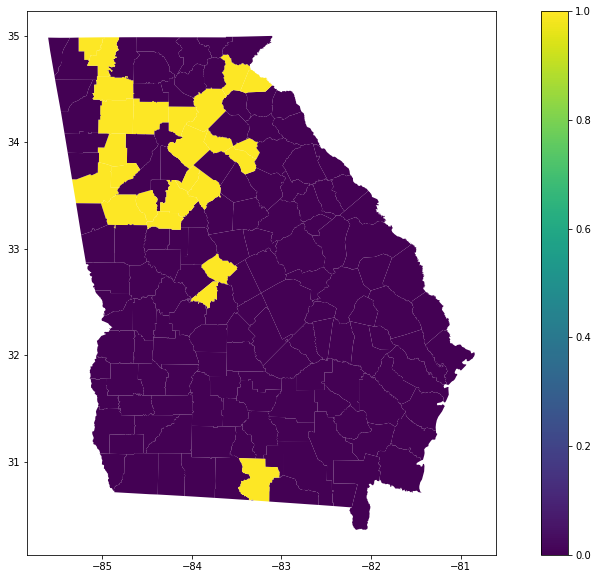

In [98]:
georgia3.plot(column="den_poprural20", figsize=(16,10), legend=True)